<a href="https://colab.research.google.com/github/stawiskm/QSAR_Modelbuilding_amesTest/blob/main/AMES_Test-Part-4-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational AMES Test [Part 4] Classification models with SVM**

Marc Jermann

In this Jupyter notebook, we will be building a real-life **data science project**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a classification model of mutagenicity using the svm algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## **2. Load the data set**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/stawiskm/QSAR_Modelbuilding_amesTest/main/data/QSAR_ames_padeldata.csv')

## **3. Input features**
The ***Ames test*** data set contains 881 input features and 1 output variable (class values).

### **3.1. Input features**

In [3]:
X = df.drop(['class',"molecule_chembl_id"], axis=1)

### **3.2. Output features**

In [4]:
Y = df["class"]

0          Toxic
1      Non-toxic
2      Non-toxic
3      Non-toxic
4      Non-toxic
         ...    
650    Non-toxic
651    Non-toxic
652    Non-toxic
653    Non-toxic
654    Non-toxic
Name: class, Length: 655, dtype: object

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(655, 881)

In [6]:
Y.shape

(655,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(655, 169)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **5. Building a Classification Model using SVM**

In [12]:
model = SVC(random_state=42)
model.fit(X_train, Y_train)

SVC(random_state=42)

In [13]:
#Accuracy
acc = model.score(X_test, Y_test)
acc

0.8396946564885496

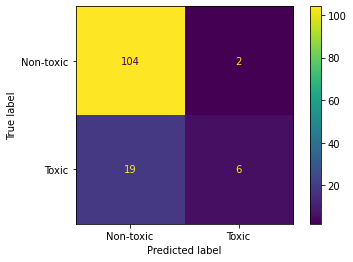

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [15]:
from sklearn.metrics import classification_report
target_names = ["Toxic","Non-toxic"]
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Toxic       0.85      0.98      0.91       106
   Non-toxic       0.75      0.24      0.36        25

    accuracy                           0.84       131
   macro avg       0.80      0.61      0.64       131
weighted avg       0.83      0.84      0.80       131

